In [ ]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
from pandas import read_csv
from pandas import to_datetime, DataFrame
from prophet import Prophet
from pandas import read_csv
from pandas import to_datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [ ]:
# load the car sales dataset

# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())
print(df['Sales'].max(), df['Sales'].min())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587
26099 5568


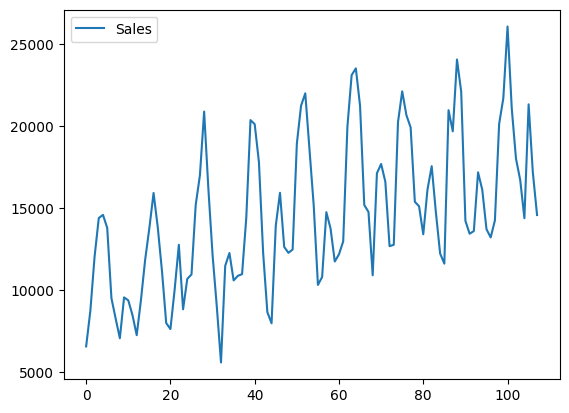

In [ ]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()

In [ ]:
# prepare expected column names

df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [ ]:
# fit prophet model on the car sales dataset

# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgjw_9u26/pc65ng1e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgjw_9u26/_tga051f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76658', 'data', 'file=/tmp/tmpgjw_9u26/pc65ng1e.json', 'init=/tmp/tmpgjw_9u26/_tga051f.json', 'output', 'file=/tmp/tmpgjw_9u26/prophet_modelsqgz19q9/prophet_model-20250130110909.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:09:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:09:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
  date = '1968-%02d' % i
  future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
print(future.head())

          ds
0 1969-01-01
1 1969-02-01
2 1969-03-01
3 1969-04-01
4 1969-05-01


In [ ]:
forecast = model.predict(future)
# forecast = model.predict(df)

           ds          yhat    yhat_lower    yhat_upper
0  1969-01-01  15413.302103  13800.570349  16976.398595
1  1969-02-01  16183.801232  14581.444914  17790.417033
2  1969-03-01  21386.578360  19781.340762  22890.332680
3  1969-04-01  23512.801152  22029.743370  25154.128440
4  1969-05-01  25021.875598  23463.940395  26588.072475
5  1969-06-01  22278.320801  20709.111785  23661.424197
6  1969-07-01  17941.595624  16292.589805  19467.558235
7  1969-08-01  15768.984268  14200.172928  17373.017666
8  1969-09-01  14275.086327  12771.287336  15871.574606
9  1969-10-01  18711.054527  17305.071526  20276.839010
10 1969-11-01  18606.037697  17046.973851  20302.825109
11 1969-12-01  16422.203664  14899.566417  18050.707448


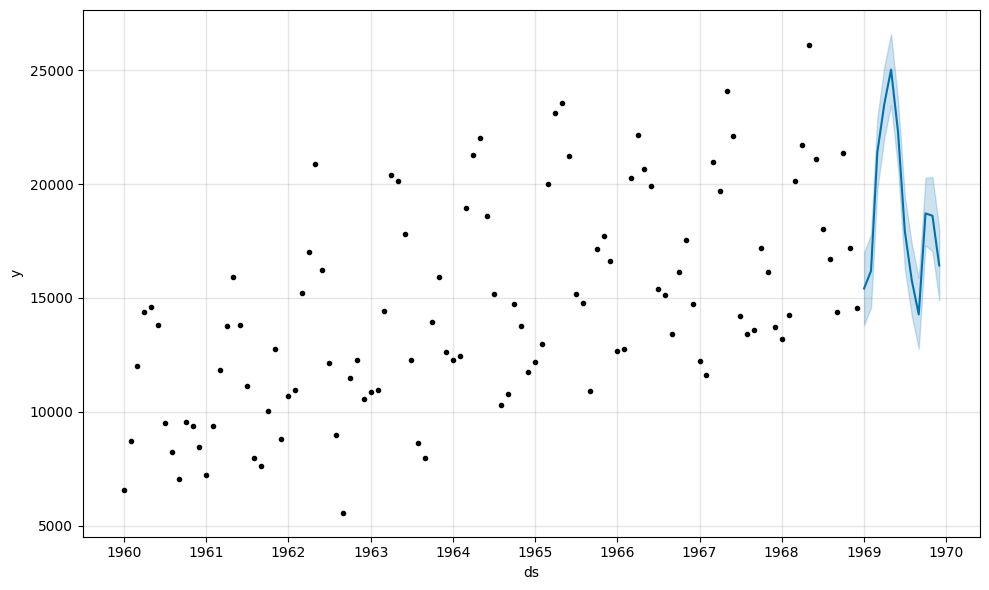

In [ ]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(15))

# plot forecast
model.plot(forecast)
pyplot.show()

In [ ]:
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())

      Month  Sales
91  1967-08  13434
92  1967-09  13598
93  1967-10  17187
94  1967-11  16119
95  1967-12  13713


In [ ]:
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
mse = mean_squared_error(y_true, y_pred)
print('MSE: %.3f' % mse)
rmse = root_mean_squared_error(y_true, y_pred)
print('RMSE: %.3f' % rmse)

MAE: 1374.204
MSE: 2434740.773
RMSE: 1560.366


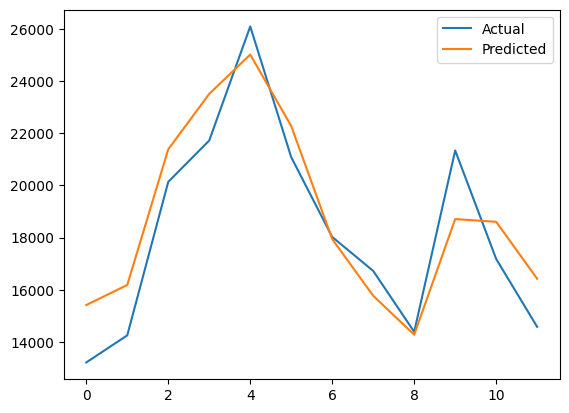

In [ ]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()